In [705]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [706]:
df = pd.read_csv('/Users/craiglynch/Desktop/Data_Science_Review/Goalcast/Live.csv')
print(df.shape)
df.head()

(7050, 16)


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### Data Cleaning

In [707]:
df.isnull().any()

status_id           False
status_type         False
status_published    False
num_reactions       False
num_comments        False
num_shares          False
num_likes           False
num_loves           False
num_wows            False
num_hahas           False
num_sads            False
num_angrys          False
Column1              True
Column2              True
Column3              True
Column4              True
dtype: bool

In [708]:
print(df['Column1'].unique())
print(df['Column2'].unique())
print(df['Column3'].unique())
print(df['Column4'].unique())

[nan]
[nan]
[nan]
[nan]


In [709]:
# Four columns have no values at all, so I will drop them
df = df.drop(df[['Column1', 'Column2', 'Column3', 'Column4']], axis=1) 

In [710]:
# Check for duplicate rows
df = df.drop_duplicates()
df.shape

(6999, 12)

* Originally had 7050 datapoints and 16 fields
* 4 fields made up of null values dropped 
* 51 duplicate rows dropped
* Moving forward, working with 6999 unique observations

### Exploring the Data

In [711]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [712]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [713]:
df['Date'] = pd.to_datetime(df['status_published']).dt.date
df['Time'] = pd.to_datetime(df['status_published']).dt.time

df = df.sort_values(["Date", "Time"], ascending = (False, True))

print(df['Date'].max())
print(df['Date'].min())

2018-06-13
2012-07-15


In [714]:
df['status_type'].value_counts()

photo     4244
video     2333
status     359
link        63
Name: status_type, dtype: int64

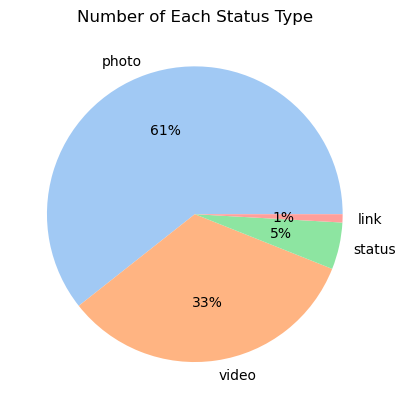

In [715]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['status_type'].value_counts(), labels =df['status_type'].value_counts().index , colors = colors, autopct='%.0f%%')
plt.title('Number of Each Status Type')
plt.show()

There are more photo posts than any other type

In [716]:
reactions = df.groupby('status_type').sum()
reactions = reactions[['num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']]
reactions["sum"] = reactions.sum(axis=1)
reactions['positive'] = reactions['num_likes'] + reactions['num_loves'] + reactions['num_wows'] + reactions['num_hahas'] 
reactions['negative'] = reactions['num_sads'] + reactions['num_angrys']
reactions= reactions.reset_index()

In [717]:
reactions

,status_type,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,sum,positive,negative
0,link,359,277,23286,19,12,2,0,0,23955,23319,0
1,photo,65678,10574,721490,5748,2623,793,536,169,807611,730654,705
2,status,13078,925,157797,549,423,40,126,9,172947,158809,135
3,video,1499524,269994,566844,82932,5711,4050,966,593,2430614,659537,1559


Reactions to each status type are overwhelmingly positive

In [718]:
interactions = df.groupby('status_type').sum()
interactions = interactions[['num_reactions','num_comments','num_shares']]
interactions

,num_reactions,num_comments,num_shares
status_type,,,
link,23319,359,277
photo,731372,65678,10574
status,158944,13078,925
video,661102,1499524,269994


reactions['sum'] - interactions['num_reactions']:
* link = 23319 - 23319 = 0
* photo = 731359 - 731342 = -13
* status = 158944 - 158944 = 0
* video = 661096 - 661102 = -6

Since the difference between reactions['sum'] and interactions['num_reactions'] is small (~19 out of 1.5 million) I will use the sum of reactions instead of the given num_reactions.

In [719]:
temp = reactions.set_index('status_type')
temp.rename({'sum': 'sum_reactions'}, axis=1, inplace=True)
interactions = temp[['sum_reactions','num_comments','num_shares']]
interactions

,sum_reactions,num_comments,num_shares
status_type,,,
link,23955,359,277
photo,807611,65678,10574
status,172947,13078,925
video,2430614,1499524,269994


In [720]:
df['status_type'].value_counts()

photo     4244
video     2333
status     359
link        63
Name: status_type, dtype: int64

## Since there are way more photos and videos compared to statuses and links, I want to understand the user engagement per post

In [721]:
# Interactions per post

perPost = interactions.T
perPost['link'] = perPost['link'].div(63)
perPost['status'] = perPost['status'].div(359)
perPost['video'] = perPost['video'].div(2333)
perPost['photo'] = perPost['photo'].div(4244)
perPost = perPost.T

In [722]:
perPost

,sum_reactions,num_comments,num_shares
status_type,,,
link,380.238095,5.698413,4.396825
photo,190.294769,15.475495,2.491517
status,481.746518,36.428969,2.576602
video,1041.840549,642.744964,115.728247


In [723]:
temp = perPost.reset_index()

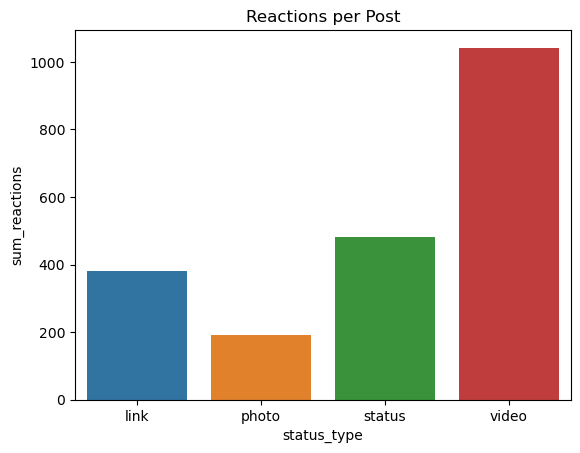

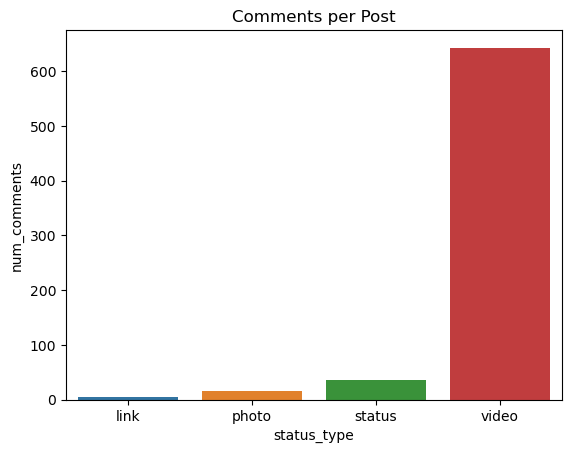

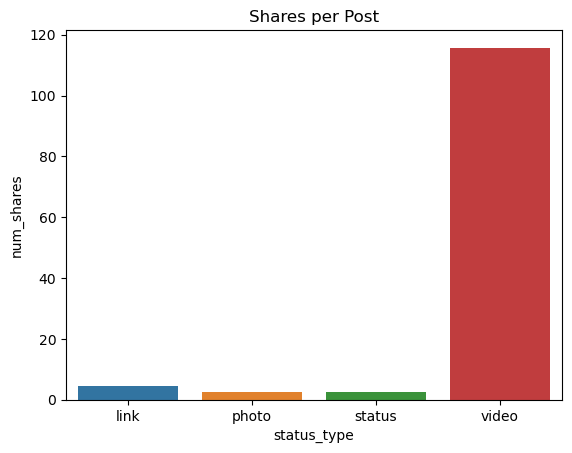

In [724]:
sns.barplot (data=temp , y='sum_reactions',x='status_type')
plt.title('Reactions per Post')
plt.show()

sns.barplot (data=temp , y='num_comments',x='status_type')
plt.title('Comments per Post')
plt.show()

sns.barplot (data=temp , y='num_shares',x='status_type')
plt.title('Shares per Post')
plt.show()

Per post, videos get the most reactions, shares, and comments

#### Breakdown by interaction type

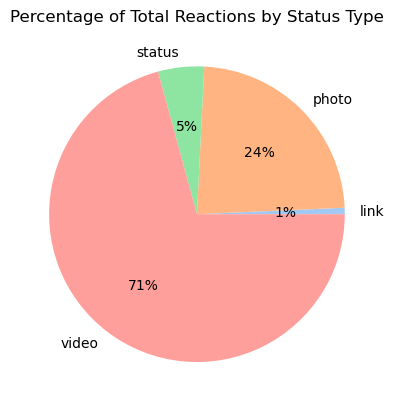

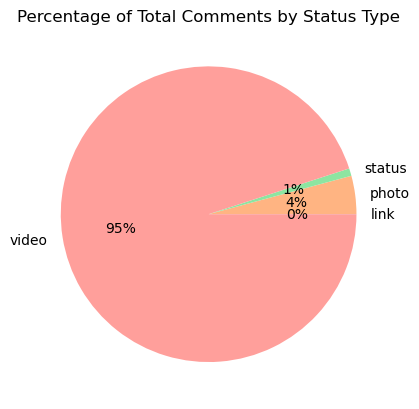

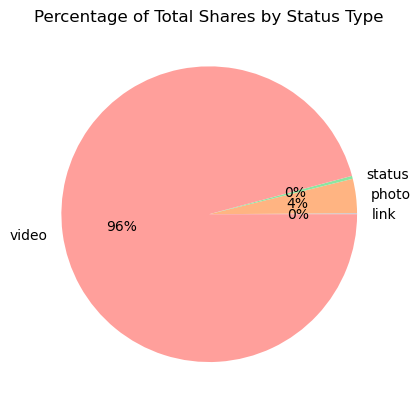

In [725]:
# Reactions
data = interactions['sum_reactions']
labels = ['link','photo','status','video']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Total Reactions by Status Type')
plt.show()

# Comments
data = interactions['num_comments']
labels = ['link','photo','status','video']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Total Comments by Status Type')
plt.show()

# Shares
data = interactions['num_shares']
labels = ['link','photo','status','video']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Total Shares by Status Type')
plt.show()

While photos and videos get similar percentages of user reactions, video gets the highest percentage of comments and shares

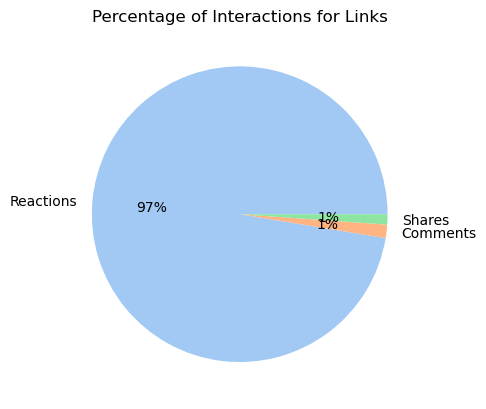

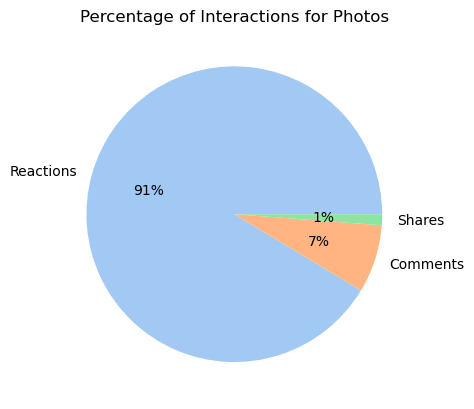

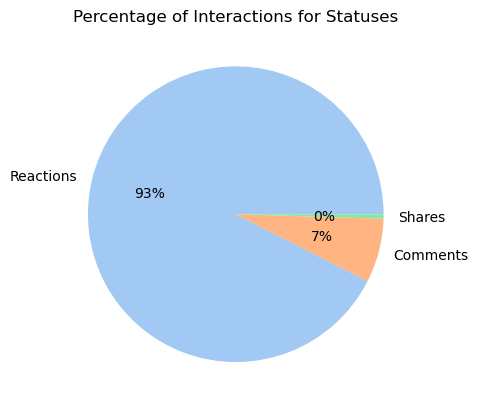

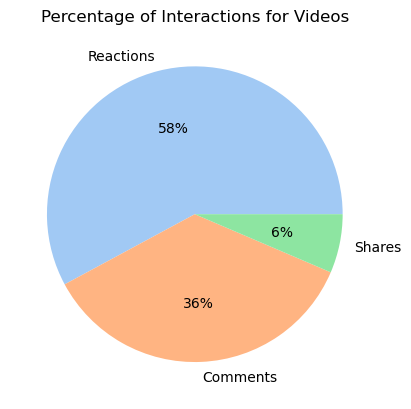

In [726]:
status_type = interactions.T
# Link
data = status_type['link']
labels = ['Reactions','Comments','Shares']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Interactions for Links')
plt.show()

# Photo
data = status_type['photo']
labels = ['Reactions','Comments','Shares']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Interactions for Photos')
plt.show()

# Status
data = status_type['status']
labels = ['Reactions','Comments','Shares']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Interactions for Statuses')
plt.show()

# Video
data = status_type['video']
labels = ['Reactions','Comments','Shares']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Interactions for Videos')
plt.show()

* Links, statuses, and photos get high levels of reactions
* Videos get high percentage of comments, and the highest percentage of shares

In [727]:
corr = interactions[['sum_reactions','num_comments','num_shares']].corr()
corr

,sum_reactions,num_comments,num_shares
sum_reactions,1.000000,0.962372,0.961472
num_comments,0.962372,1.000000,0.999984
num_shares,0.961472,0.999984,1.000000


The number of comments and the number of shares is correlated

In [728]:
corr = df[['num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys','num_comments','num_shares']].corr()
corr

,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_comments,num_shares
num_likes,1.000000,0.212715,0.200015,0.123129,0.057110,0.096276,0.105934,0.179664
num_loves,0.212715,1.000000,0.510148,0.507899,0.226574,0.394818,0.521320,0.820284
num_wows,0.200015,0.510148,1.000000,0.288468,0.091425,0.191672,0.163506,0.409803
num_hahas,0.123129,0.507899,0.288468,1.000000,0.154035,0.225083,0.325064,0.399864
num_sads,0.057110,0.226574,0.091425,0.154035,1.000000,0.143711,0.257545,0.218628
num_angrys,0.096276,0.394818,0.191672,0.225083,0.143711,1.000000,0.239557,0.332355
num_comments,0.105934,0.521320,0.163506,0.325064,0.257545,0.239557,1.000000,0.640536
num_shares,0.179664,0.820284,0.409803,0.399864,0.218628,0.332355,0.640536,1.000000


Users are more likely to comment or share if they "love" the status type

In [729]:
interactions['total'] = interactions['sum_reactions'] + interactions['num_comments'] + interactions['num_shares']
interactions

,sum_reactions,num_comments,num_shares,total
status_type,,,,
link,23955,359,277,24591
photo,807611,65678,10574,883863
status,172947,13078,925,186950
video,2430614,1499524,269994,4200132


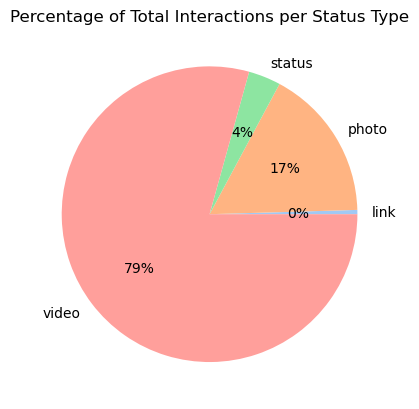

In [730]:
data = interactions['total']
labels = ['link','photo','status','video']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Total Interactions per Status Type')
plt.show()

Videos have the most total interactions

### Feature Engineering

In [731]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Date,Time
4732,614855718638584_855483231242497,video,6/13/2018 0:58,97,177,210,48,49,0,0,0,0,2018-06-13,00:58:00
4731,614855718638584_855485821242238,video,6/13/2018 0:59,27,0,18,27,0,0,0,0,0,2018-06-13,00:59:00
4730,614855718638584_855501374574016,photo,6/13/2018 1:12,2,0,0,2,0,0,0,0,0,2018-06-13,01:12:00
4752,614855718638584_853742228083264,video,6/12/2018 1:01,182,356,229,109,72,0,1,0,0,2018-06-12,01:01:00
4751,614855718638584_853747008082786,video,6/12/2018 1:03,29,0,3,29,0,0,0,0,0,2018-06-12,01:03:00


In [755]:
video = df[df.values  == 'video']
print("Video Introduction")
print(video['Date'].max())
print(video['Date'].min())
photo = df[df.values  == 'photo']
print("Photo Introduction")
print(photo['Date'].max())
print(photo['Date'].min())
link = df[df.values  == 'link']
print("Link Introduction")
print(link['Date'].max())
print(link['Date'].min())
status = df[df.values  == 'status']
print("Status Introduction")
print(status['Date'].max())
print(status['Date'].min())

Video Introduction
2018-06-13 00:00:00
2013-09-04 00:00:00
Photo Introduction
2018-06-13 00:00:00
2012-07-15 00:00:00
Link Introduction
2018-06-10 00:00:00
2014-03-10 00:00:00
Status Introduction
2018-06-11 00:00:00
2013-01-02 00:00:00


In [732]:
# Creating the sum reactions (like above) due to the discrepancy between num_reactions
df['sum_reactions'] = df['num_likes'] + df['num_loves'] + df['num_wows'] + df['num_hahas'] + df['num_sads'] + df['num_angrys']
df['total_interaction'] = df['sum_reactions'] + df['num_comments'] + df['num_shares']

# convert the 'Date' column to datetime format
df['Date'] = df['Date'].astype('datetime64[ns]')
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek

df['hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

datetime = df[['status_type','total_interaction','hour','day','month','year','day_of_week']]
datetime

,status_type,total_interaction,hour,day,month,year,day_of_week
4732,video,484,0,13,6,2018,2
4731,video,45,0,13,6,2018,2
4730,photo,2,1,13,6,2018,2
4752,video,767,1,12,6,2018,1
4751,video,32,1,12,6,2018,1
...,...,...,...,...,...,...,...
2624,photo,18,6,15,7,2012,6
2623,photo,24,6,15,7,2012,6
2622,photo,15,6,15,7,2012,6
2621,photo,63,8,15,7,2012,6


In [733]:
datetime.groupby('year').sum()[['total_interaction']]

,total_interaction
year,
2012,16552
2013,49055
2014,147095
2015,533334
2016,170390
2017,1081573
2018,1437128


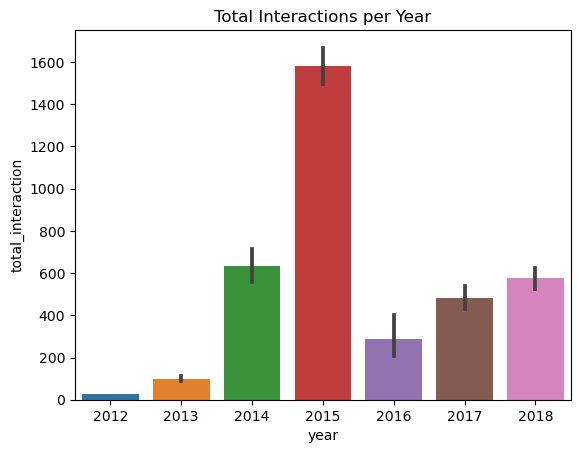

In [734]:
# Interactions per year
sns.barplot (data=datetime , y='total_interaction',x='year')
plt.title('Total Interactions per Year')
plt.show()

#### Facebook launches "reactions" in 2016. This introduction may have affected how the algorithms calculate interactions

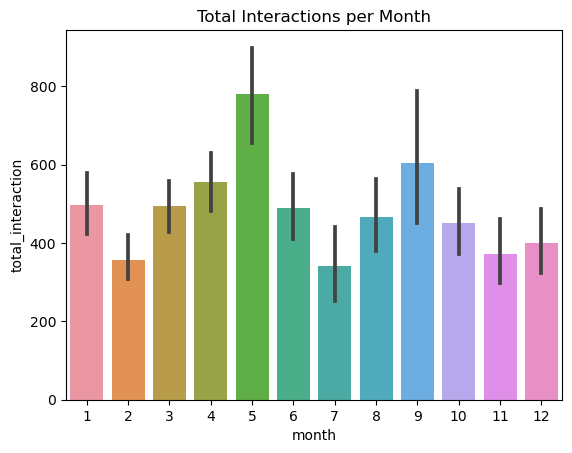

In [735]:
# Interactions per month
sns.barplot (data=datetime , y='total_interaction',x='month')
plt.title('Total Interactions per Month')
plt.show()

#### Spring and Fall appear to have more user interactions, possibly because buyers are getting ready for the upcoming season

Data begins in July, 2012 and ends in June, 2018. - This makes nearly a full year so I will not adjust the monthly data

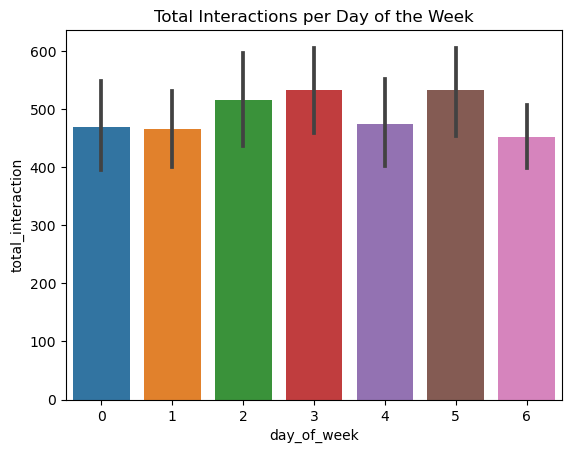

In [736]:
# Interaction per day of week
sns.barplot (data=datetime , y='total_interaction',x='day_of_week')
plt.title('Total Interactions per Day of the Week')
plt.show()

#### Even interactions spread across the week

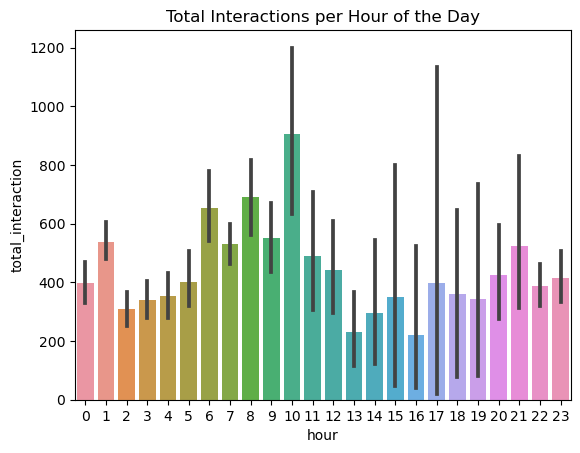

In [737]:
# Interaction per hour of day
sns.barplot (data=datetime , y='total_interaction',x='hour')
plt.title('Total Interactions per Hour of the Day')
plt.show()

#### Highest activity during morning hours (7-11)

In [738]:
datetime

,status_type,total_interaction,hour,day,month,year,day_of_week
4732,video,484,0,13,6,2018,2
4731,video,45,0,13,6,2018,2
4730,photo,2,1,13,6,2018,2
4752,video,767,1,12,6,2018,1
4751,video,32,1,12,6,2018,1
...,...,...,...,...,...,...,...
2624,photo,18,6,15,7,2012,6
2623,photo,24,6,15,7,2012,6
2622,photo,15,6,15,7,2012,6
2621,photo,63,8,15,7,2012,6


# Predictive Model to Forecast Engagement Metrics of Future Posts 

* Using data from 2016 onwards as this was when "Reactions" were first introduced

In [739]:
start_date = 2016
df_after_2016 = df[df["year"] >= start_date]
df_after_2016 = df_after_2016.drop(df_after_2016[['status_id','status_published', 'num_reactions','Time','total_interaction']], axis=1)
df_after_2016.shape

(5340, 16)

In [740]:
df_after_2016.describe()

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,sum_reactions,day,month,year,day_of_week,hour
count,5340.00000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000
mean,291.30824,51.941948,140.605618,16.713109,1.642135,0.914794,0.304869,0.144382,160.324906,15.637640,6.493633,2017.357865,2.983333,7.670412
std,1012.89997,149.114896,256.789523,45.190381,9.957591,4.524314,1.689166,0.785198,290.130030,8.769849,3.672967,0.670900,2.010159,6.848724
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000
25%,0.00000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,8.000000,3.000000,2017.000000,1.000000,2.000000
50%,3.00000,0.000000,58.000000,1.000000,0.000000,0.000000,0.000000,0.000000,61.000000,16.000000,6.000000,2017.000000,3.000000,7.000000
75%,51.00000,9.250000,165.000000,7.000000,1.000000,0.000000,0.000000,0.000000,199.000000,23.000000,10.000000,2018.000000,5.000000,9.000000
max,20990.00000,3424.000000,4315.000000,657.000000,278.000000,157.000000,51.000000,31.000000,4410.000000,31.000000,12.000000,2018.000000,6.000000,23.000000


In [741]:
# To adjust for outliers, I will remove any row that has more than 3x standard deviation of sum_reactions

df_after_2016 = df_after_2016.drop(df_after_2016[df_after_2016['sum_reactions'] > 870].index)
df_after_2016 = df_after_2016.drop(df_after_2016[df_after_2016['num_comments'] > 3039].index)
df_after_2016 = df_after_2016.drop(df_after_2016[df_after_2016['num_shares'] > 447].index)

df_after_2016.shape

# 317 rows removed

(5023, 16)

# I want to predict interactions a post will get

In [742]:
df_after_2016['total_interactions'] = df_after_2016['num_comments'] + df_after_2016['num_shares'] + df_after_2016['sum_reactions']

In [743]:
df_after_2016.describe()

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,sum_reactions,day,month,year,day_of_week,hour,total_interactions
count,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000
mean,129.948437,28.074657,98.474617,9.983277,0.668127,0.510054,0.213219,0.090981,109.940275,15.620944,6.513239,2017.341828,2.978698,7.681664,267.963369
std,352.525363,72.090087,123.801772,23.781406,1.635781,2.738258,1.512239,0.697241,134.383235,8.780661,3.707894,0.675285,2.009967,6.959660,476.387786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,3.000000,2017.000000,1.000000,2.000000,15.000000
50%,2.000000,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,16.000000,6.000000,2017.000000,3.000000,7.000000,59.000000
75%,22.500000,4.000000,140.000000,4.000000,1.000000,0.000000,0.000000,0.000000,170.000000,23.000000,10.000000,2018.000000,5.000000,9.000000,282.500000
max,3022.000000,446.000000,858.000000,225.000000,28.000000,102.000000,51.000000,31.000000,867.000000,31.000000,12.000000,2018.000000,6.000000,23.000000,3918.000000


In [744]:
df_after_2016['status_type'].value_counts()

photo     2975
video     1737
status     263
link        48
Name: status_type, dtype: int64

### Linear Regression

In [745]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math 
from sklearn import preprocessing

def predict_lr(postType,reaction):
    #postType = 'video'
    temp = df_after_2016[df_after_2016.values  == postType]
    X = temp[['hour','day','month','year','day_of_week']]
    #reaction = 'num_comments'
    y = temp[reaction]

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    y_pred_lr = lr_model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
    print("RMSE: %f" % (rmse))

    mae = mean_absolute_error(y_test, y_pred_lr)
    print("MAE: %f" % (mae))

    r2 = r2_score(y_test, y_pred_lr)
    print(f'R^2: {round(r2, 6)}')
    
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
    print(df.head())

    prediction = pd.DataFrame(lr_model.fit(X_train,y_train).predict(X_test))
    y_test = pd.DataFrame(y_test)
    Results=y_test.merge(prediction, left_index=True, right_index=True)
    MAPE = math.sqrt((abs(Results[0]-Results[reaction]).mean()**2))

    Results=Results.reset_index()[[reaction,0]]
    Results.columns=['Actual','Predicted']

    Results.plot(kind='line')
    plt.show()
    



RMSE: 572.092915
MAE: 404.959908
R^2: 0.013119
      Actual   Predicted
4830       0  351.908412
6385    1660  346.446384
5532     718  330.828106
4212       0  346.783937
3093    1043  420.015986


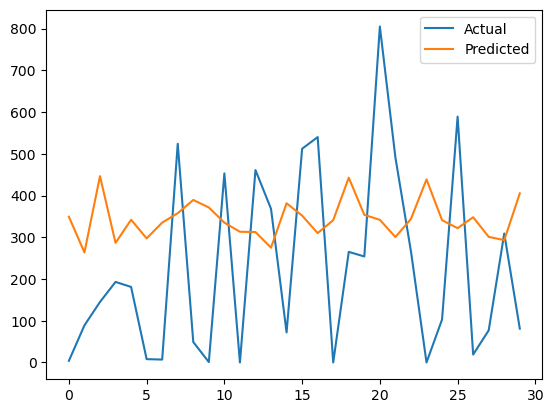

In [746]:
predict_lr('video','num_comments')

### RandomForest

In [747]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import math 
from sklearn import preprocessing

def predict_rf(postType,reaction):
    #postType = 'video'
    temp = df_after_2016[df_after_2016.values  == postType]
    X = temp[['hour','day','month','year','day_of_week']]
    #reaction = 'num_comments'
    y = temp[reaction]

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

    rf_model = RandomForestRegressor(n_estimators=20)
    rf_model.fit(X_train, y_train)

    y_pred_rf = rf_model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    print("RMSE: %f" % (rmse))    

    mae = mean_absolute_error(y_test, y_pred_rf)
    print("MAE: %f" % (mae))

    r2 = r2_score(y_test, y_pred_rf)
    print(f'R^2: {round(r2, 6)}')
    
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
    print(df.head())

    prediction = pd.DataFrame(rf_model.fit(X_train,y_train).predict(X_test))
    y_test = pd.DataFrame(y_test)
    Results=y_test.merge(prediction, left_index=True, right_index=True)
    MAPE = math.sqrt((abs(Results[0]-Results[reaction]).mean()**2))

    Results=Results.reset_index()[[reaction,0]]
    Results.columns=['Actual','Predicted']

    Results.plot(kind='line')
    plt.show()


RMSE: 597.827880
MAE: 396.219077
R^2: -0.077665
      Actual    Predicted
4830       0   364.053333
6385    1660   753.800000
5532     718   209.977500
4212       0  1446.530000
3093    1043   193.600000


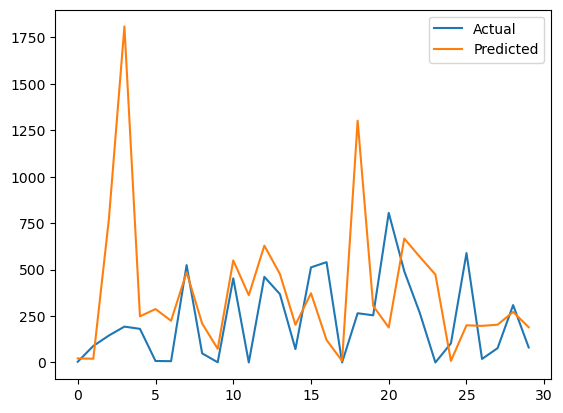

In [748]:
predict_rf('video','num_comments')

RMSE: 9.338594
MAE: 3.633450
R^2: -0.594774
      Actual  Predicted
3814       0   0.000000
33         0   4.050000
784        0   5.550000
3074       7   1.458333
6164       0   0.150000


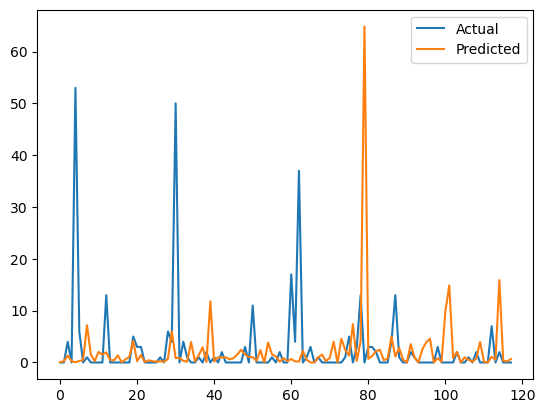

In [749]:
predict_rf('photo','num_shares')

RMSE: 165.233940
MAE: 92.452192
R^2: 0.016007
      Actual  Predicted
6872      34    22.5500
6353      98   287.4000
4673     679   327.9000
6893      23    72.4875
649       49    74.2500


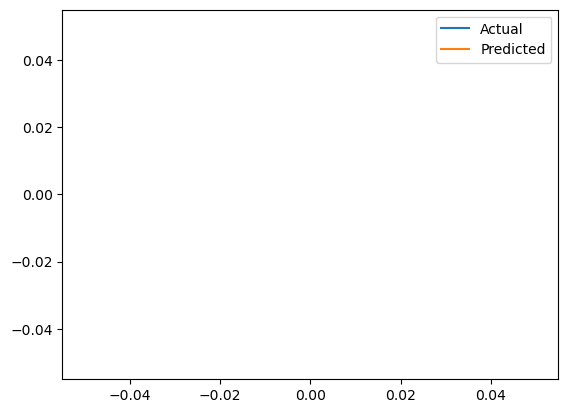

In [750]:
predict_rf('status','sum_reactions')

RMSE: 36.381868
MAE: 26.871289
R^2: -0.165103
      Actual  Predicted
4830       0  48.300000
6385      31  25.670833
5532      74  49.950000
4212       0  70.450000
3093      65  18.658333


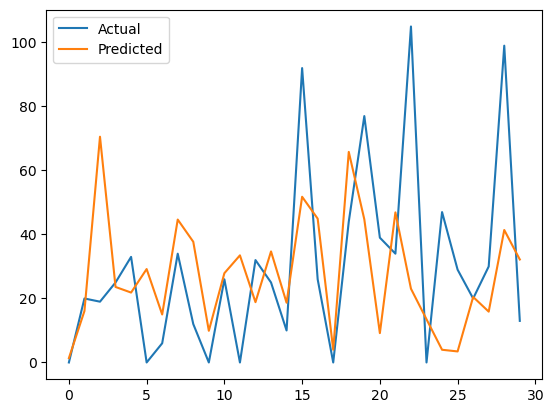

In [751]:
predict_rf('video','num_loves')

RMSE: 0.721688
MAE: 0.541667
R^2: 0.278846
      Actual  Predicted
366        0       0.15
6454       0       0.25
3491       0       1.10
6325       0       0.00
595        2       0.90


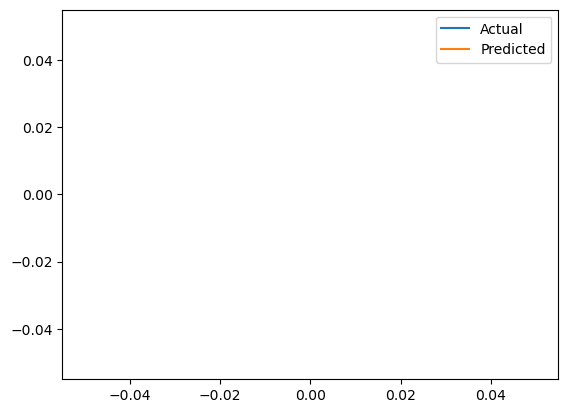

In [752]:
predict_rf('link','num_loves')

# Findings
* Original dataset contained 7050 observations, with 51 duplicates which were removed
* Data ranges from July, 2012 to June, 2018, Video first launched in September, 2013, Link first launched in March, 2014, Status first launched in January, 2013
* Links, statuses, and photos get high levels of reactions
* Videos get high percentage of comments, and the highest percentage of shares
* Per post, videos get the most total reactions, shares, and comments
* The number of comments and the number of shares are correlated
* Users are more likely to comment or share if they "love" the status type
* Spring and Fall appear to have more user interactions, possibly because buyers are getting ready for the upcoming season
* Highest activity during morning hours (7-11)
* A drop in user interaction occured in 2016, most likely from Facebook launching "reactions" in 2016. This introduction may have affected how the algorithms calculate interactions



# Improvements

* The RandomForest is my best model, however it could be improved by tuning hyperparameters
* There is a large data imbalance, "status" and "link" do not have enough data to provide accurate predictions

In [668]:
# from sklearn import preprocessing

# postType = 'video'
# temp = df_after_2016[df_after_2016.values  == postType]
# X = temp[['hour','day','month','year','day_of_week']]
# reaction = 'num_comments'
# y = temp[reaction]

# # standardizing data
# scaler = preprocessing.StandardScaler().fit(X)
# X = scaler.transform(X)




# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)

# y_pred_lr = lr_model.predict(X_test)

# rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
# print("RMSE: %f" % (rmse))

# mae = mean_absolute_error(y_test, y_pred_lr)
# print("MAE: %f" % (mae))

# r2 = r2_score(y_test, y_pred_lr)
# print(f'R^2: {round(r2, 6)}')

# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
# print(df.head())

# prediction = pd.DataFrame(lr_model.fit(X_train,y_train).predict(X_test))
# y_test = pd.DataFrame(y_test)
# Results=y_test.merge(prediction, left_index=True, right_index=True)
# MAPE = math.sqrt((abs(Results[0]-Results[reaction]).mean()**2))

# Results=Results.reset_index()[[reaction,0]]
# Results.columns=['Actual','Predicted']

# Results.plot(kind='line')
# plt.show()